In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

plt.rcParams['font.family'] = 'HYGraphic-Medium'

In [3]:
df = {}

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
    df[i].drop(labels=df[i][df[i]['아내지역코드'] > 39].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편지역코드'] > 39].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내직업코드'] == 99].index, inplace=True)

mandic = {1:10015,2:5011,3:4833,5:3325.5,6:2582,7:3510,8:3539,9:2494,13:0}
womandic = {1:8024,2:3136,3:3256,5:2119,6:2060,7:2156,8:2795,9:1897,13:0}

for i in range(2010,2021):
    df[i]['남편소득수준'] = df[i]['남편직업코드']
    df[i]['아내소득수준'] = df[i]['아내직업코드']
    
    for j in mandic.keys():
        df[i]['남편소득수준'].replace(j,mandic[j], inplace=True)
        df[i]['아내소득수준'].replace(j,womandic[j], inplace=True)

C:\Users\nexen\AppData\Local\Temp\ipykernel_33292\723785479.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_33292\723785479.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_33292\723785479.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\nexen\AppData\Local\Temp\ipykernel_33292\723785479.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")


In [4]:
df[2019]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,...,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드,남편소득수준,아내소득수준
0,2019,11,19,31,31,2019,11,2,2,5,...,1,1,40.454,36.178,1.0,NaN,1.0,NaN,5011.0,3136
1,2019,11,19,31,31,2019,11,2,2,5,...,1,1,31.723,26.580,1.0,NaN,1.0,NaN,5011.0,3136
2,2019,11,19,31,31,2019,11,2,2,5,...,1,1,29.545,29.389,1.0,NaN,1.0,NaN,5011.0,3136
3,2019,11,22,31,31,2019,11,3,3,5,...,1,1,32.123,29.715,1.0,NaN,1.0,NaN,4833.0,3256
4,2021,4,6,31,31,2019,4,3,3,5,...,1,1,30.378,29.021,NaN,NaN,NaN,NaN,4833.0,3256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209804,2019,6,14,21,21,2019,4,2,3,5,...,1,1,31.202,32.786,1.0,NaN,1.0,NaN,5011.0,3256
209805,2019,6,7,23,23,2019,6,5,5,4,...,1,1,28.010,25.309,1.0,NaN,1.0,NaN,3325.5,2119
209806,2019,6,14,38,38,2019,6,2,13,5,...,1,1,29.961,24.512,1.0,NaN,1.0,NaN,5011.0,0
209807,2019,6,7,23,23,2019,6,5,2,5,...,1,1,31.112,30.013,1.0,NaN,1.0,NaN,3325.5,3136


In [5]:
year = 2019
# 소득  (연속)

# 소득 차이 (연속)

# 여성결혼연령 (연속)



# 연상혼
df[year].loc[df[year]['남편연령'] < df[year]['아내연령'], "연상혼 유무"] = 1
df[year].loc[df[year]['남편연령'] >= df[year]['아내연령'], "연상혼 유무"] = 0

# 아내 대도시
df[year].loc[df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내 대도시 유무"] = 1
df[year].loc[~df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내 대도시 유무"] = 0

# 남편 대도시
df[year].loc[df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편 대도시 유무"] = 1
df[year].loc[~df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편 대도시 유무"] = 0

# 남자 결혼 종류

# 여자 결혼 종류

# 아내 초혼 여부
df[year].loc[df[year]['아내결혼코드'] == 1, "아내 초혼 여부"] = 1
df[year].loc[df[year]['아내결혼코드'] != 1, "아내 초혼 여부"]= 0

# 남편 초혼 여부
df[year].loc[df[year]['남편결혼코드'] == 1, "남편 초혼 여부"] = 1
df[year].loc[df[year]['남편결혼코드'] != 1, "남편 초혼 여부"]= 0

# 결혼 종류 차이 여부
df[year].loc[df[year]['남편 초혼 여부'] == df[year]['아내 초혼 여부'], "결혼종류 차이 유무"] = 1
df[year].loc[df[year]['남편 초혼 여부'] != df[year]['아내 초혼 여부'], "결혼종류 차이 유무"]= 0

# 강혼 유무
df[year].loc[df[year]['아내교육코드'] > df[year]['남편교육코드'], "강혼 유무"] = 1
df[year].loc[~(df[year]['아내교육코드'] > df[year]['남편교육코드']), "강혼 유무"] = 0


### 연상혼 -> 강혼 

In [6]:
crosstab = pd.crosstab(df[year]['연상혼 유무'], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 연도 연상혼 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 연도 연상혼 -> 강혼 카이제곱 검정 -----------------
c-val : 467.3145771178549
P-val : 1.2306651401924075e-103
dof : 1


### 아내 대도시 -> 강혼

In [7]:
crosstab = pd.crosstab(df[year]["아내 대도시 유무"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 아내 대도시 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 아내 대도시 -> 강혼 카이제곱 검정 -----------------
c-val : 8.870394630954348
P-val : 0.0028983248060417753
dof : 1


### 남편 대도시 -> 강혼

In [8]:
crosstab = pd.crosstab(df[year]["남편 대도시 유무"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 남편 대도시 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 남편 대도시 -> 강혼 카이제곱 검정 -----------------
c-val : 34.935255705611965
P-val : 3.4085275463568994e-09
dof : 1


### 결혼종류 차이 유무 -> 강혼

In [9]:
crosstab = pd.crosstab(df[year]["결혼종류 차이 유무"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 결혼종류 차이 유무 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 결혼종류 차이 유무 -> 강혼 카이제곱 검정 -----------------
c-val : 24.836720243094867
P-val : 6.239742512172959e-07
dof : 1


### 남성 결혼 종류 -> 강혼

In [10]:
crosstab = pd.crosstab(df[year]["남편결혼코드"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab)

print(f"-------------- 2019 남편 결혼 종류 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 남편 결혼 종류 -> 강혼 카이제곱 검정 -----------------
c-val : 72.48936593806386
P-val : 1.2504986570851082e-15
dof : 3


### 여성 결혼 종류 -> 강혼

In [11]:
crosstab = pd.crosstab(df[year]["아내결혼코드"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 아내 결혼 종류 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 아내 결혼 종류 -> 강혼 카이제곱 검정 -----------------
c-val : 147.3353273639967
P-val : 9.898101372199756e-32
dof : 3


### 여성 연령 -> 강혼

<AxesSubplot:xlabel='강혼 유무', ylabel='아내연령'>

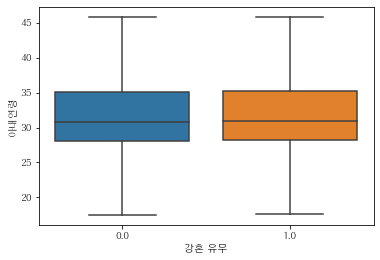

In [15]:
sns.boxplot(x=df[2019]['강혼 유무'], y=df[2019]['아내연령'], showfliers=False)